In [1]:
!pip install plotly==5.9.0⁸88

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement plotly==5.9.0⁸88 (from versions: 0.2, 0.3, 0.4, 0.5, 0.5.1, 0.5.2, 0.5.3, 0.5.4, 0.5.5, 0.5.6, 0.5.7, 0.5.8, 0.5.9, 0.5.10, 0.5.11, 0.5.12, 0.5.13, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.0.6, 1.0.7, 1.0.8, 1.0.9, 1.0.10, 1.0.11, 1.0.12, 1.0.13, 1.0.14, 1.0.15, 1.0.16, 1.0.17, 1.0.18, 1.0.19, 1.0.20, 1.0.21, 1.0.22, 1.0.23, 1.0.24, 1.0.25, 1.0.26, 1.0.27, 1.0.28, 1.0.29, 1.0.30, 1.0.31, 1.0.32, 1.0.33, 1.0.34, 1.1.0, 1.1.1, 1.1.2, 1.1.3, 1.1.4, 1.2.0, 1.2.1, 1.2.2, 1.2.3, 1.2.4, 1.2.6, 1.2.7, 1.2.8, 1.2.9, 1.3.0, 1.3.1, 1.3.2, 1.4.0, 1.4.1, 1.4.2, 1.4.3, 1.4.4, 1.4.5, 1.4.7, 1.4.9, 1.4.10, 1.4.11, 1.4.12, 1.4.13, 1.4.14, 1.5.0, 1.6.4, 1.6.6, 1.6.7, 1.6.8, 1.6.9, 1.6.10, 1.6.11, 1.6.12, 1.6.13, 1.6.14, 1.6.15, 1.6.16, 1.6.17, 1.6.19, 1.7.0, 1.7.1, 1.7.2, 1.7.3, 1.7.4, 1.7.5, 1.7.6, 1.7.7, 1.7.9, 1.8.0, 1.8.1, 1.8.2, 1.8.3, 

In [2]:
!pip install biokit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 5.0 MB/s 
     |████████████████████████████████| 47 kB 4.6 MB/s 
     |████████████████████████████████| 197 kB 47.1 MB/s 
     |████████████████████████████████| 2.3 MB 7.4 MB/s 
     |████████████████████████████████| 51 kB 614 kB/s 
     |████████████████████████████████| 47 kB 4.3 MB/s 
     |████████████████████████████████| 144 kB 8.6 MB/s 
     |████████████████████████████████| 5.8 MB 41.6 MB/s 
     |████████████████████████████████| 251 kB 44.9 MB/s 
     |████████████████████████████████| 3.2 MB 41.7 MB/s 
     |████████████████████████████████| 90 kB 4.7 MB/s 
     |████████████████████████████████| 121 kB 28.3 MB/s 
     |████████████████████████████████| 100 kB 7.0 MB/s 
     |████████████████████████████████| 1.1 MB 47.0 MB/s 
     |████████████████████████████████| 84 kB 3.5 MB/s 
     |████████████████████████████████| 133 k

In [3]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from biokit.viz import corrplot
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import seaborn as sns
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

Creating directory /root/.config/biokit 
Creating directory /root/.config/bioservices 


In [13]:
url = 'Wine.csv'
dados = pd.read_csv(url)
dados.shape

(178, 14)

In [14]:
print(f'retornando os dados {dados.shape[0]} amostras e tem {dados.shape[1]} colunas')
dados.head()

retornando os dados 178 amostras e tem 14 colunas


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [15]:
dados_v1 = dados.rename(columns={'Alcohol' : 'Alcool', 'Ash' : 'Po',
                                        'Ash_Alcanity': 'Alcalinidade_po',
                                        'Magnesium' : 'Magnesio',
                                        'Total_Phenols' : 'Total_Fenois',
                                        'Nonflavanoid_Phenols':'Fenois_nao_flavalonoides',
                                        'Color_Intensity':'Intensidade_de_cor'})

In [16]:
dados_v1.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [17]:
dados_v1.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [18]:
matriz_de_correlacao = dados_v1.corr()
matriz_de_correlacao

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
Alcool,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Po,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Alcalinidade_po,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesio,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Total_Fenois,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Fenois_nao_flavalonoides,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
Intensidade_de_cor,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


<bound method Figure.show of <Figure size 1080x720 with 2 Axes>>

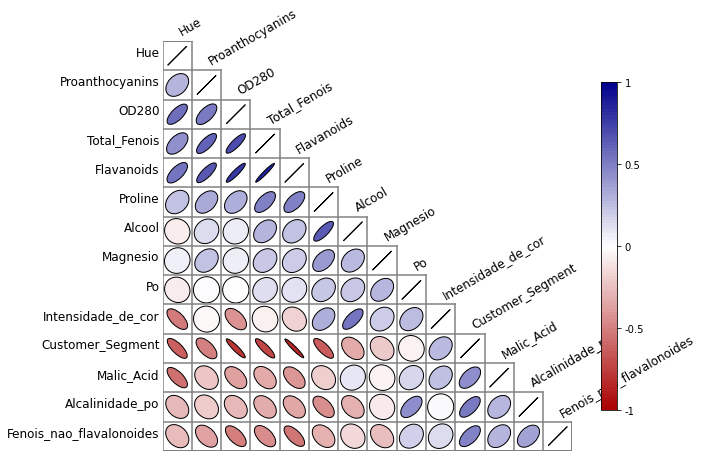

In [19]:
corr_graf = corrplot.Corrplot(matriz_de_correlacao)
corr_graf.plot(lower='ellipse', fontsize=12)
fig = plt.gcf()
fig.set_size_inches(15,10)
fig.show

In [20]:
dados_v1.describe()
#os dados variam difente e isso é ruim para os modelos de m.l não trabalham bem

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [21]:
atributos = dados_v1.columns

In [22]:
#agora os dados estão nomalizados de 0 até 1
for atributo in atributos:
    dados_v1[atributo] = (dados_v1[atributo]-min(dados_v1[atributo]))/(max(dados_v1[atributo])-min(dados_v1[atributo]))

In [23]:
dados_v1.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0


OUTRA FORMA DE NORMALIZAR É USANDO O PREPROCCESSING

In [24]:
colunas = dados_v1.columns

In [25]:
min_max_scaller = preprocessing.MinMaxScaler()
np_dados_v1 = min_max_scaller.fit_transform(dados_v1)
dados_v1 = pd.DataFrame(dados_v1, columns = colunas)

dados_v1.describe()


,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
# o inverse ele desnomarliza os dados ele volta 
np_dados_v1 = min_max_scaller.inverse_transform(dados_v1)
np_dados_v1

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.97069597, 0.56134094,
        0.        ],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.78021978, 0.55064194,
        0.        ],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.6959707 , 0.64693295,
        0.        ],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.10622711, 0.39728959,
        1.        ],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.12820513, 0.40085592,
        1.        ],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.12087912, 0.20114123,
        1.        ]])

K-MEANS

In [27]:
agrupador = KMeans(n_clusters=4)

In [28]:
agrupador.fit(dados_v1)

KMeans(n_clusters=4)

In [29]:
labels = agrupador.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 2 3 2 2 2 3 2 3 2 2 2
 2 3 2 3 2 2 2 2 3 3 2 2 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 3 2 3 2 3 3 3 2 2 2
 2 3 3 3 3 2 2 3 2 2 2 2 2 2 2 2 3 2 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [30]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dados_v1['Intensidade_de_cor']
                         , y=dados_v1['Alcool']
                         , mode='markers'
                         , marker=dict(color = agrupador.labels_.astype(np.float)),text = labels))
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [31]:
agrupador = KMeans(n_clusters=3)
agrupador.fit(dados_v1)
labels = agrupador.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [32]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dados_v1['Intensidade_de_cor'],
                         y = dados_v1['Alcool'], mode = 'markers',                      
                          marker = dict(color = agrupador.labels_.astype(np.float)),
                        text = labels))

fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



GRAFICO EM 3D

In [33]:
agrupamento = KMeans(n_clusters=3)
agrupamento.fit(dados_v1)
labels = agrupamento.labels_

In [34]:
fig = go.Figure()
fig.add_traces(go.Scatter3d(x=dados_v1['Intensidade_de_cor']
                           , y=dados_v1['Alcool']
                           , z=dados_v1['Proline']
                           , mode='markers'
                           , marker = dict(color = labels.astype(np.float))
                           , text = labels))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [35]:
fig.update_layout(scene = dict(
                    xaxis_title='Intensidade de Cor',
                    yaxis_title='Àlcool',
                    zaxis_title='Proline'))
fig.show()

In [36]:
centro = pd.DataFrame(agrupador.cluster_centers_)
centro.columns = colunas
centro.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,0.558324,0.514721,0.574703,0.558700,0.315439,0.240746,0.096616,0.605314,0.237559,0.517343,0.167413,0.153921,0.249323,0.989796
1,0.711096,0.250000,0.587166,0.342955,0.400906,0.644080,0.557138,0.299371,0.470137,0.359386,0.476558,0.693590,0.595958,0.008333
2,0.322960,0.230939,0.469813,0.487823,0.261342,0.438831,0.366294,0.438337,0.383486,0.151704,0.468081,0.555396,0.167494,0.500000


In [37]:
fig.add_trace(go.Scatter3d(x=centro['Intensidade_de_cor'],
                          y = centro['Alcool'],
                          z=centro['Proline'],
                          mode = 'markers',                  
                          marker = dict(color = 'red'),
                          text = [0, 1, 2]))
fig.show()

DBSCAN

In [38]:
agrupador = DBSCAN(eps=1.5 , min_samples = 15 ,metric="manhattan")
agrupador.fit(dados_v1)
agrupador.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  1,  1,  1,  1, -1,  1,
       -1, -1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1, -1,
        1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  2,  2,  2,  2,  2,
        2,  2,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,
        2,  2,  2,  2,  2, -1, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2])

In [39]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=dados_v1['Intensidade_de_cor'],
                         y=dados_v1['Alcool'], z = dados_v1['Proline'],
                         mode='markers',                      
                      marker=dict(color =labels),
                        text=labels))
fig.show()

MEAN-SHIFT

In [40]:
from sklearn.cluster import estimate_bandwidth
BW = estimate_bandwidth(dados_v1, quantile = 0.8)
print(BW)

1.4612284092106413


In [41]:
BW = estimate_bandwidth(dados_v1, quantile = 0.2)
agrupador = MeanShift(bandwidth=BW)
agrupador.fit(dados_v1)
agrupador.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [42]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=dados_v1['Intensidade_de_cor'],
                         y=dados_v1['Alcool'], z=dados_v1['Proline'],
                         mode = 'markers',                      
                          marker = dict(color = agrupador.labels_),
                        text = [0, 1, 2]))
fig.show()

In [43]:
fig.update_layout(scene = dict(
                    xaxis_title='Intensidade de Cor',
                    yaxis_title='Àlcool',
                    zaxis_title='Proline'))
fig.show()

In [44]:
centros = pd.DataFrame(agrupador.cluster_centers_)
centros.columns = atributos

In [45]:
fig.add_trace(go.Scatter3d(x=centros['Intensidade_de_cor'],
                         y=centros['Alcool'], z=centros['Proline'],
                         mode = 'markers',                  
                          marker = dict(color = 'red'),
                        text = [0, 1, 2]))

COEFICIENTE DO KMEANS

In [47]:
faixa_n_clusters = [i for i in range(2,11)]
print(faixa_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [48]:
from sklearn.cluster import KMeans
valores_silhueta = []
for k in faixa_n_clusters:
    agrupador = KMeans(n_clusters=k)
    labels = agrupador.fit_predict(dados_v1)
    media_silhueta = silhouette_score(dados_v1, labels)
    valores_silhueta.append(media_silhueta)


In [49]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = faixa_n_clusters, y = valores_silhueta))
fig.update_layout(
    title = "Valores de Silhueta Médios",
    xaxis_title = "Número de Clústeres",
    yaxis_title = "Valor médio de silhueta",
    )

COEFICIENTE DO MEAN-SHIFT

In [50]:
faixa_quantil = np.linspace(0.02, 0.5, 15, 30)
faixa_quantil

array([0.02      , 0.05428571, 0.08857143, 0.12285714, 0.15714286,
       0.19142857, 0.22571429, 0.26      , 0.29428571, 0.32857143,
       0.36285714, 0.39714286, 0.43142857, 0.46571429, 0.5       ])

In [51]:
quantil_plot = []

for quantil in faixa_quantil:
    bandwidth = estimate_bandwidth(dados_v1, quantile = quantil)
    agrupador = MeanShift(bandwidth = bandwidth)
    labels =  agrupador.fit_predict(dados_v1)

    if len(np.unique(labels)) < len(dados_v1) and len(np.unique(labels)) > 1:
      media_silhueta = silhouette_score(dados_v1, labels)
      quantil_plot.append(quantil)



In [52]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = quantil_plot,
                         y = valores_silhueta))
fig.update_layout(dict(xaxis_title = 'Quantil',
                       yaxis_title='Média Silhueta')),
fig.show()

DBSCAN

In [53]:
from collections import Counter
#20 valores para cada parâmetro.
faixa_min_samples = [i for i in range(1,100,5)]
faixa_eps = [i/10 for i in range(1,100,1)]

In [54]:
valores_silhueta = []
eps_plot = []
min_samples_plot = []
for min_samples in faixa_min_samples:
  for eps in faixa_eps:
    labels = 0
    agrupador = DBSCAN(eps = eps, min_samples = min_samples, metric = 'manhattan')
    agrupador.fit_predict(dados_v1)
    labels = agrupador.labels_
    if(Counter(labels)[0] < len(dados_v1) and Counter(labels)[0] > 1): 
    #porque não é possível calcular
    # silhueta para apenas  um cluster ou para número de clústeres igual
    # ao número de dados 
      media_silhueta = silhouette_score(dados_v1, labels)
      valores_silhueta.append(media_silhueta)
      eps_plot.append(eps)
      min_samples_plot.append(min_samples)

In [55]:
ind = valores_silhueta.index(max(valores_silhueta))
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=[min_samples_plot[ind]],
                         y = [eps_plot[ind]], z = [max(valores_silhueta)],
                         mode = 'markers',marker_line_color="midnightblue", 
                          marker_symbol=['x']))
fig.add_trace(go.Scatter3d(x=min_samples_plot,
                         y = eps_plot, z = valores_silhueta,
                         mode = 'markers',
                        text = labels))
fig.update_layout(scene = dict(
                    xaxis_title='eps',
                    yaxis_title='min_samples',
                    zaxis_title='silhueta'))
fig.show()

In [56]:
# pega o índice do maior valor do coeficiente de silhueta
ind = valores_silhueta.index(max(valores_silhueta))
# printa os valores de eps e min_samples para o maior valor de coeficiente de silhueta encontrado
print(eps_plot[ind])
print(min_samples_plot[ind])

2.7
81


In [57]:
print(max(valores_silhueta))

0.3584231880254969


VENDO QUAL É O MELHOR CLUSTER NESSE CASO

In [58]:
agrupador_kmeans = KMeans(n_clusters = 3)
agrupador_DBSCAN = DBSCAN(eps = 2.1, min_samples = 56, metric = 'manhattan')

BW = estimate_bandwidth(dados_v1, quantile = 0.28)
agrupador_meanshift = MeanShift(bandwidth = BW)

labels_kmeans = agrupador_kmeans.fit_predict(dados_v1)
labels_DBSCAN = agrupador_DBSCAN.fit_predict(dados_v1)
labels_meanshift = agrupador_meanshift.fit_predict(dados_v1)

print("Labels K-means: ", labels_kmeans)
print("Labels DBSCAN: ", labels_DBSCAN)
print("Labels MeanShift: ", labels_meanshift)

Labels K-means:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Labels DBSCAN:  [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1  0  0 -1  0  0  0 -1 -1 -1  0
  0 -1  0  0  0 -1 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0 -1
 -1  0  0 -1  0  0  0  0  0 -1  0  0  0  0 -1  0 -1  0  0 -1  0  0 -1  0
  0 -1 -1  0 -1  0  0 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Labels MeanShift:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [59]:
print("O coeficiente de silhueta do K-means é:", silhouette_score(dados_v1, labels_kmeans))
print("O coeficiente de silhueta do DBSCAN é: ", silhouette_score(dados_v1,labels_DBSCAN))
print("O coeficiente de silhueta do MeanShift é: ", silhouette_score(dados_v1, labels_meanshift))

O coeficiente de silhueta do K-means é: 0.36950618492736303
O coeficiente de silhueta do DBSCAN é:  0.3016232115094375
O coeficiente de silhueta do MeanShift é:  0.3059152866115628
